In [25]:
import numpy as np,cv2,imutils
from sklearn.externals import joblib
from google.colab.patches import cv2_imshow

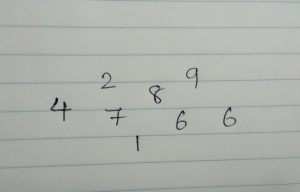

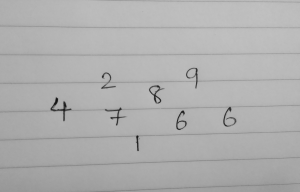

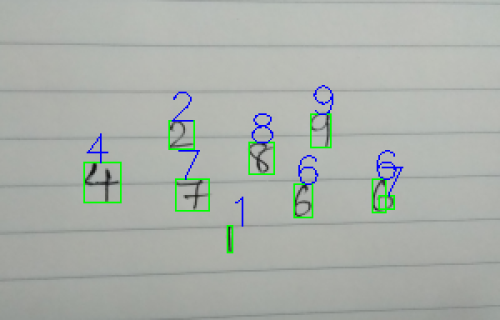

True

In [26]:
img = cv2.imread('/content/sample_data/test_image.jpg')

img = imutils.resize(img,width=300)

cv2_imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)

kernel = np.ones((40,40),np.uint8)

blackhat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)

ret,thresh = cv2.threshold(blackhat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

cnts,hie = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

model = joblib.load('/content/sample_data/digit_recog.pkl')
for c in cnts:
    try:
        mask = np.zeros(gray.shape,dtype="uint8")
        (x,y,w,h) = cv2.boundingRect(c)
        hull = cv2.convexHull(c)
        cv2.drawContours(mask,[hull],-1,255,-1)    
        mask = cv2.bitwise_and(thresh,thresh,mask=mask)
        roi = mask[y-7:y+h+7,x-7:x+w+7]       
        roi = cv2.resize(roi,(28,28))
        roi = np.array(roi)
        roi = roi.reshape(1,784)
        prediction = model.predict(roi)
    
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        cv2.putText(img,str(int(prediction)),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)
        
    except Exception as e:
        print(e)
        
img = imutils.resize(img,width=500)
cv2_imshow(img)
cv2.imwrite('/content/sample_data/output.jpg',img)